# Расчетное задание ММФ

In [18]:
import numpy as np
import math 
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

### Выборка 28

In [19]:
a1 = [-1.177, 0.079, 0.054, 0.592, -0.093, -0.612, -1.844, -0.128, -1.793, -0.454,  
     -0.168, -2.269, -2.190, -1.262, 0.088, 0.072, -1.736, -0.766, 0.286, -0.824]

a2 = [-3.157, -2.600, -0.484, 0.492, -0.550, -1.767, -1.766, -0.521, -2.543, -0.992, 
      -0.836, -1.138, -0.961, -1.639, -1.328, -1.814, -2.163, 0.380, -1.877, -0.732,  
      -1.606, 0.525, -0.669, -0.617, -1.108, -2.114, 0.481, -0.560, -0.669, -2.087]

b = [0.002, 0.982, 0.664, 0.896, 0.024, 0.047, 0.114, 0.517, 0.761, 0.728,
     0.597, 0.899, 0.400, 0.079, 0.781, 0.139, 0.996, 0.022, 0.206, 0.303,
     0.446, 0.616, 0.794, 0.898, 0.531, 0.713, 0.332, 0.234, 0.395, 0.813]
a = a1 + a2
eps = 0.08

## Часть 1

In [20]:
# Доверительный интервал 1
n = len(a)
m = np.mean(a)
h = math.sqrt(1.1 / n) * sp.stats.norm.ppf(1-eps/2)
m-h, m+h

(-1.2309687078599958, -0.7116312921400042)

In [21]:
# Доверительный интервал 2
n = len(a)
m, se = np.mean(a), np.std(a, ddof = 1)
h = se * sp.stats.t.ppf(1-eps/2, n-1) / math.sqrt(n)
m-h, m+h

(-1.209435512644101, -0.7331644873558989)

In [22]:
# Доверительный интервал 3
n = len(a)
sum = 0
for i in range(len(a)):
    sum += (a[i] + 1) ** 2
sum /= n
h1 = n * sum / sp.stats.chi2.ppf(eps / 2, n)
h2 = n * sum / sp.stats.chi2.ppf(1 - eps / 2, n)
min(h1, h2), max(h1, h2)

(0.63240522339495575, 1.2819270127475733)

In [23]:
# Доверительный интервал 4
n = len(a)
h1 = (n - 1) * np.var(a, ddof = 1) / sp.stats.chi2.ppf(eps / 2, n - 1)
h2 = (n - 1) * np.var(a, ddof = 1) / sp.stats.chi2.ppf(1 - eps / 2, n - 1)
min(h1, h2), max(h1, h2)

(0.6428008163280805, 1.3125524200848957)

### Проверка гипотезы однородности

In [24]:
# Критерий Фишера
n = len(a1)
m = len(a2)
s1 = np.var(a1, ddof = 1)
s2 = np.var(a2, ddof = 1)
rho = max(s1, s2) / min(s1, s2) # s2 > s1
q1 = sp.stats.f.ppf(eps / 2, m - 1, n - 1)
q2 = sp.stats.f.ppf(1 - eps / 2, m - 1, n - 1)
print(rho)
min(q1, q2), max(q1, q2) 

1.15394705563


(0.48879384463761422, 2.1803217074375278)

In [25]:
# Критерий Стьюдента
n = len(a1)
m = len(a2)
rho = math.sqrt(n*m/(n+m))*(np.mean(a1)-np.mean(a2))/math.sqrt(((n-1)*np.var(a1, ddof = 1)+(m-1)*np.var(a2, ddof = 1))/(n+m-2))
q1 = sp.stats.t.ppf(eps/2, n+m-2)
q2 = sp.stats.t.ppf(1-eps/2, n+m-2)
print(rho)
min(q1, q2), max(q1, q2) 

1.64656499194


(-1.7885467032422269, 1.7885467032422264)

## Часть 2

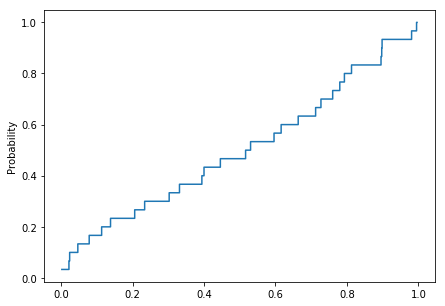

In [26]:
ecdf = ECDF(b)
x = np.linspace(min(b), max(b), num = 1000)
y = ecdf(x)
plt.figure(figsize=(7,5))
plt.ylabel('Probability');
plt.step(x, y)
plt.show()

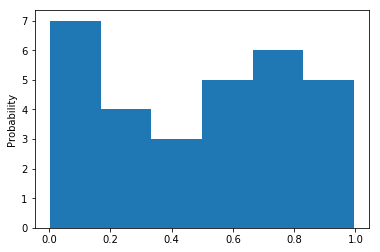

In [27]:
# 5.7563304402 число интервалов для диаграммы
plt.hist(b, 6)
#plt.axis([40, 160, 0, 0.03])
#plt.grid(True)
plt.ylabel('Probability');
plt.show()

In [28]:
# Критерий Колмогорова
ecdf = ECDF(b)
n = len(b)
x = np.linspace(min(b), max(b), num = 1000)
y = ecdf(x)
y1 = x
Dn = math.sqrt(n) * max(abs(y1 - y))
print(Dn, "Dn")
print(1 - sp.stats.kstwobign.cdf(Dn), "РДУЗ")
0.0, sp.stats.kstwobign.ppf(1 - eps)

0.514990789054 Dn
0.953539182787 РДУЗ


(0.0, 1.2686236263238111)

In [31]:
# Критерий хи-квадрат
k = 6 #Число областей
delta = 1.0 / k
h1 = 0
b1 = sorted(b)
num = np.zeros(k)
n = len(b1)

for j in range(k):
    for i in range(n):
        if (b1[i]>=h1) & (b1[i]<(h1+delta)):
            num[j]+=1
    h1+=delta

sum = 0
p = 1.0 / k
for l in range(k):
    sum += ((num[l] - n * p) ** 2 )/ (n * p)
print(sum)
print(1 - sp.stats.chi2.cdf(sum, k-1), "РДУЗ")
0.0, sp.stats.chi2.ppf(1 - eps, k-1)


2.0
0.991564101069 РДУЗ


(0.0, 9.8365912849350536)